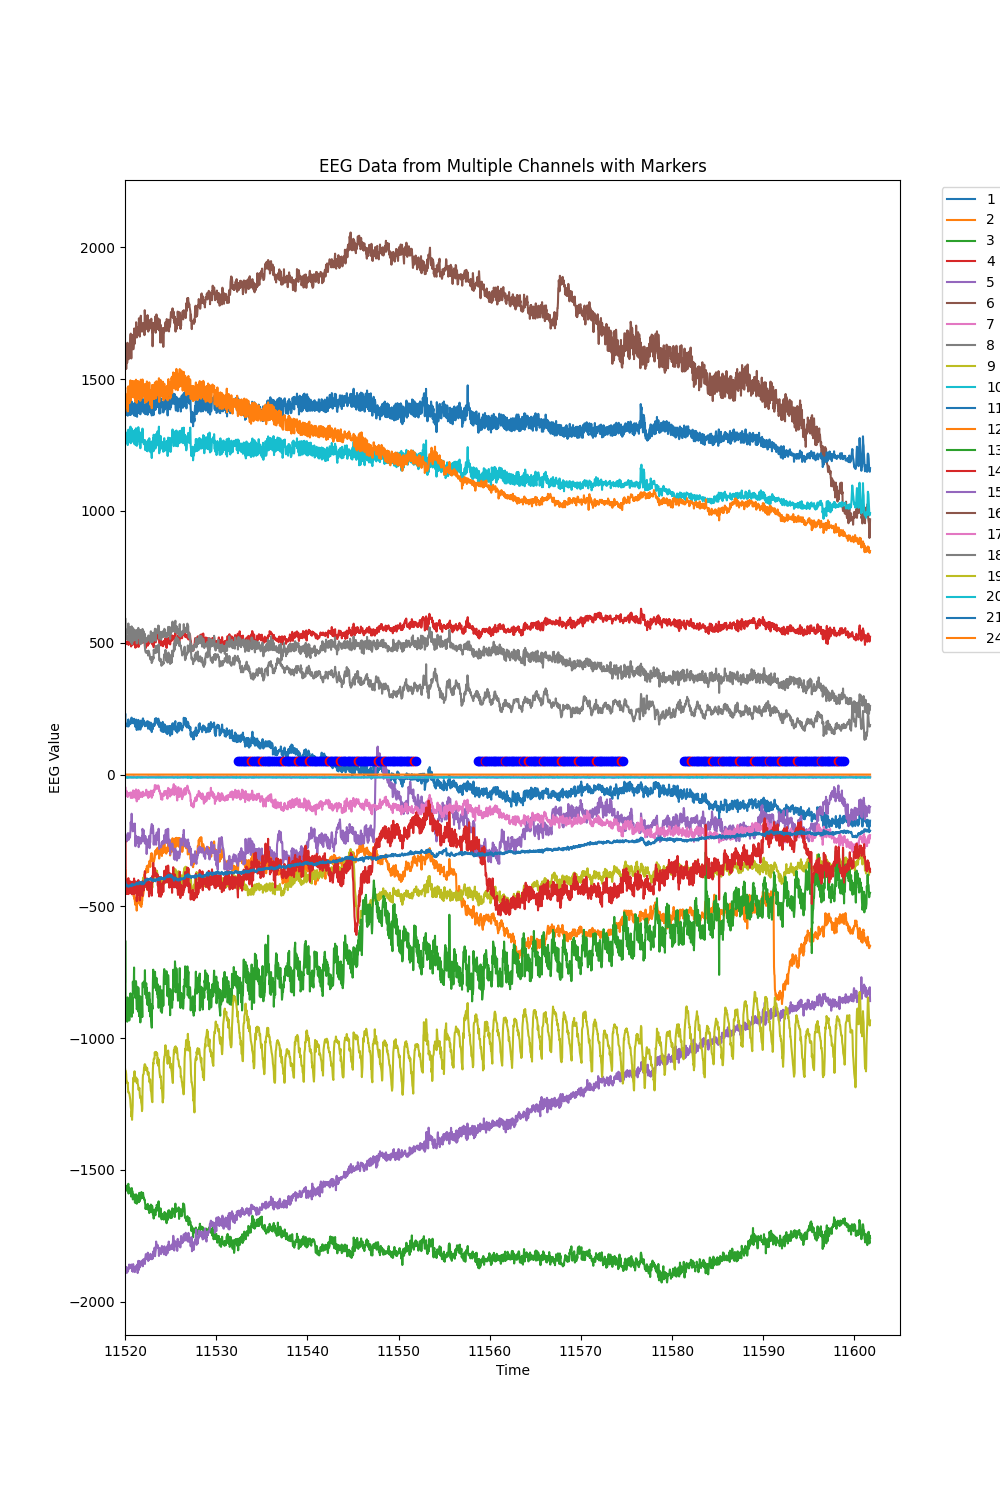

In [1]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipympl
import numpy as np

# Enable interactive plots
    
%matplotlib widget

# Load the data
eeg_data = pd.read_csv('./2024-05-31 13-57-45_EEG.csv')
markers = pd.read_csv('./2024-05-31 13-57-45_markers.csv')

# Display the first few rows of each dataframe to understand their structure
# print(eeg_data.head())
# print(markers.head())

# Assuming the EEG data has columns named 'Channel1', 'Channel2', ..., 'Channel24' and 'Time'
channel_columns = eeg_data.columns[1:-1]  # All columns except the first last one
time_column = eeg_data.columns[-1]  # The last column

# Slice the data to plot every 100th row
eeg_data_sliced = eeg_data.iloc[::10, :]


# assign labels to marker columns
markers.columns = [' ', 'Marker', 'Time']

# Plot the EEG data for all channels
plt.figure(figsize=(10, 15))

for index, channel in enumerate(channel_columns):
    if ((index+1) != 22 and (index+1) != 23):
        plt.plot(eeg_data_sliced[time_column], eeg_data_sliced[channel], label=(index+1))

# Mark events on the EEG plot
for index, row in markers.iterrows():
    if (len(row['Marker']) == 12): # isolate p300 markers (not 0, Trial Started, Trial Ended)
        if (str(row['Marker'])[9] == str(row['Marker'])[11]): # check if chosen stimulus is the one in the marker (to see p300 responses)
            plt.plot(row['Time'], 50, marker='o', color='r', linestyle='--')
        else:
            plt.plot(row['Time'], 50, marker='o', color='b', linestyle='--')



# Set x-axis limit to start at 150
plt.xlim(left=11520, right=11605)


plt.xlabel('Time')
plt.ylabel('EEG Value')
plt.title('EEG Data from Multiple Channels with Markers')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


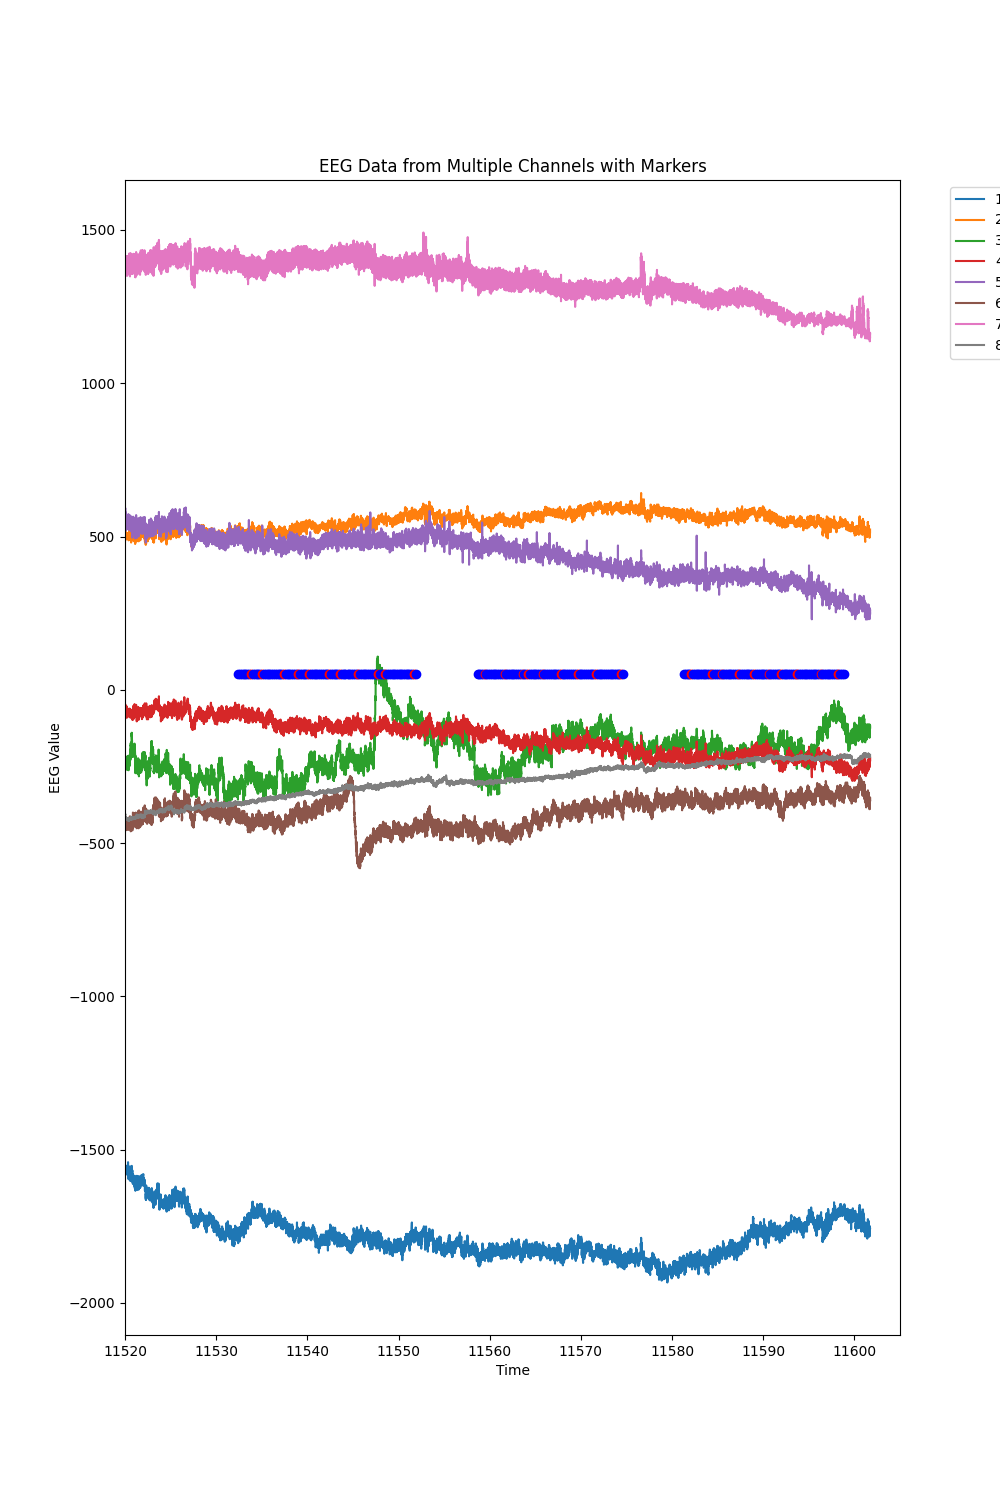

In [2]:
# Define a function to identify bad channels based on variance
def identify_bad_channels(eeg_data, high_threshold=6500.0, low_threshold=50):
    variances = eeg_data.var(axis=0)
    bad_channels = variances[(variances > high_threshold) | (variances < low_threshold)].index
    return bad_channels

# Identify bad channels
bad_channels = identify_bad_channels(eeg_data[channel_columns])

# Remove bad channels from the data
eeg_data_filtered = eeg_data.drop(columns=bad_channels)
channel_columns_filtered = eeg_data_filtered.columns[1:-1]  # Update channel columns after filtering

# Plot the EEG data for all channels
plt.figure(figsize=(10, 15))

for index, channel in enumerate(channel_columns_filtered):
    if ((index+1) != 22 and (index+1) != 23):
        plt.plot(eeg_data_filtered[time_column], eeg_data_filtered[channel], label=(index+1))

# Mark events on the EEG plot
for index, row in markers.iterrows():
    if (len(row['Marker']) == 12): # isolate p300 markers (not 0, Trial Started, Trial Ended)
        if (str(row['Marker'])[9] == str(row['Marker'])[11]): # check if chosen stimulus is the one in the marker (to see p300 responses)
            plt.plot(row['Time'], 50, marker='o', color='r', linestyle='--')
        else:
            plt.plot(row['Time'], 50, marker='o', color='b', linestyle='--')



# Set x-axis limit to start at 150
plt.xlim(left=11520, right=11605)


plt.xlabel('Time')
plt.ylabel('EEG Value')
plt.title('EEG Data from Multiple Channels with Markers')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


      Unnamed: 0   Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 7  Unnamed: 8  \
3964        3964 -1771.896362  517.079102 -306.072693  -86.642670  492.448944   
3965        3965 -1783.028931  517.062744 -312.098572  -72.855721  493.353333   
3966        3966 -1767.078369  525.211914 -299.440735  -63.496975  517.428467   
3967        3967 -1773.843994  516.625854 -310.131683  -68.786644  504.043488   
3968        3968 -1771.889648  520.671753 -309.391846  -56.940781  520.141968   
...          ...          ...         ...         ...         ...         ...   
4259        4259 -1776.100708  511.316742 -310.642883  -74.112907  496.974640   
4260        4260 -1777.149170  507.552399 -304.798004  -86.886910  490.510193   
4261        4261 -1770.984619  508.916656 -301.028686  -75.009369  507.206787   
4262        4262 -1764.063355  512.227661 -300.720917  -82.205864  487.044983   
4263        4263 -1761.658081  515.236206 -303.718720  -83.099609  487.042725   

      Unnamed: 9  Unnamed: 

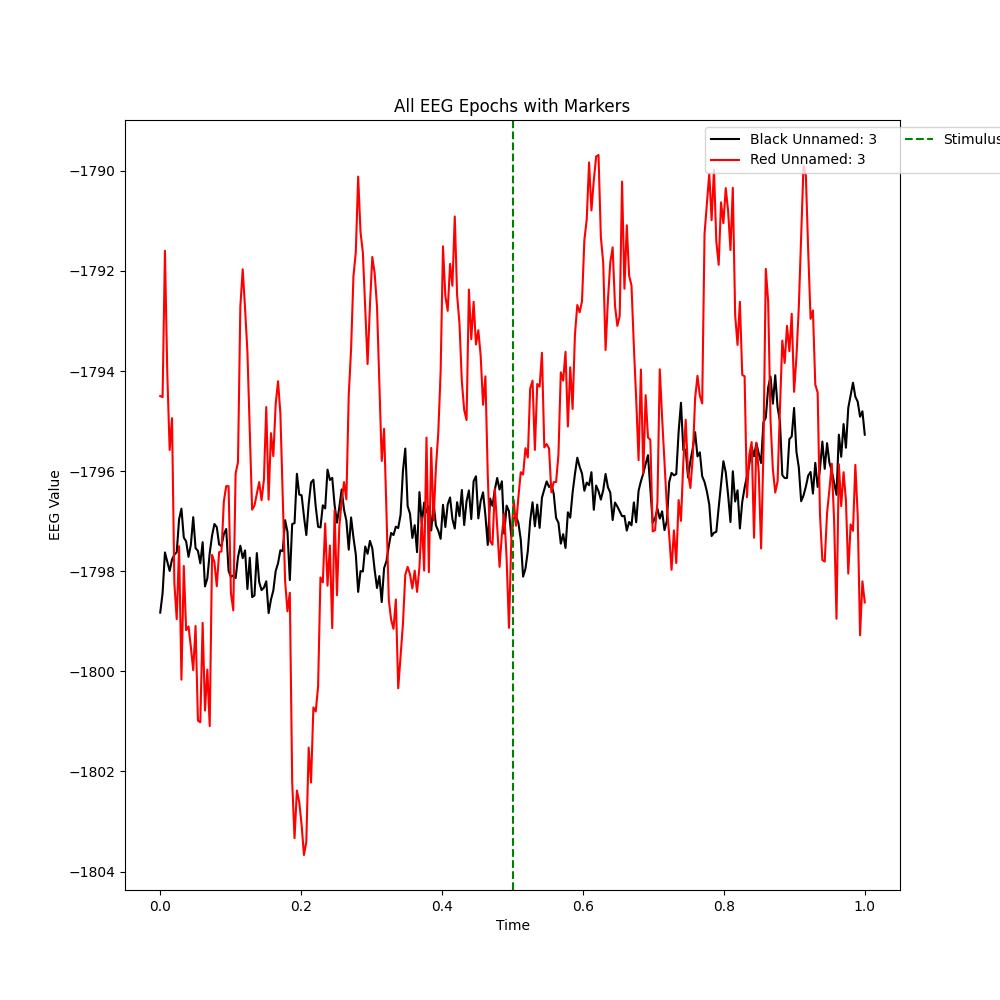

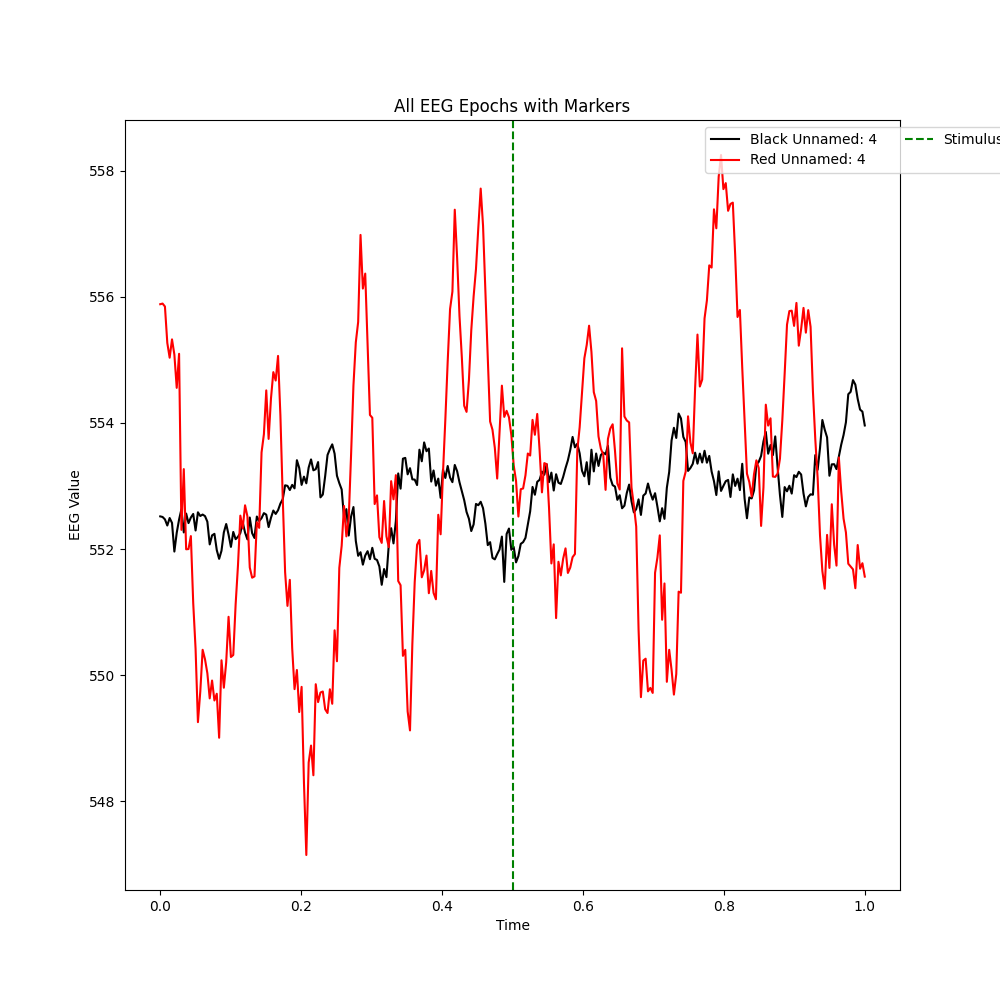

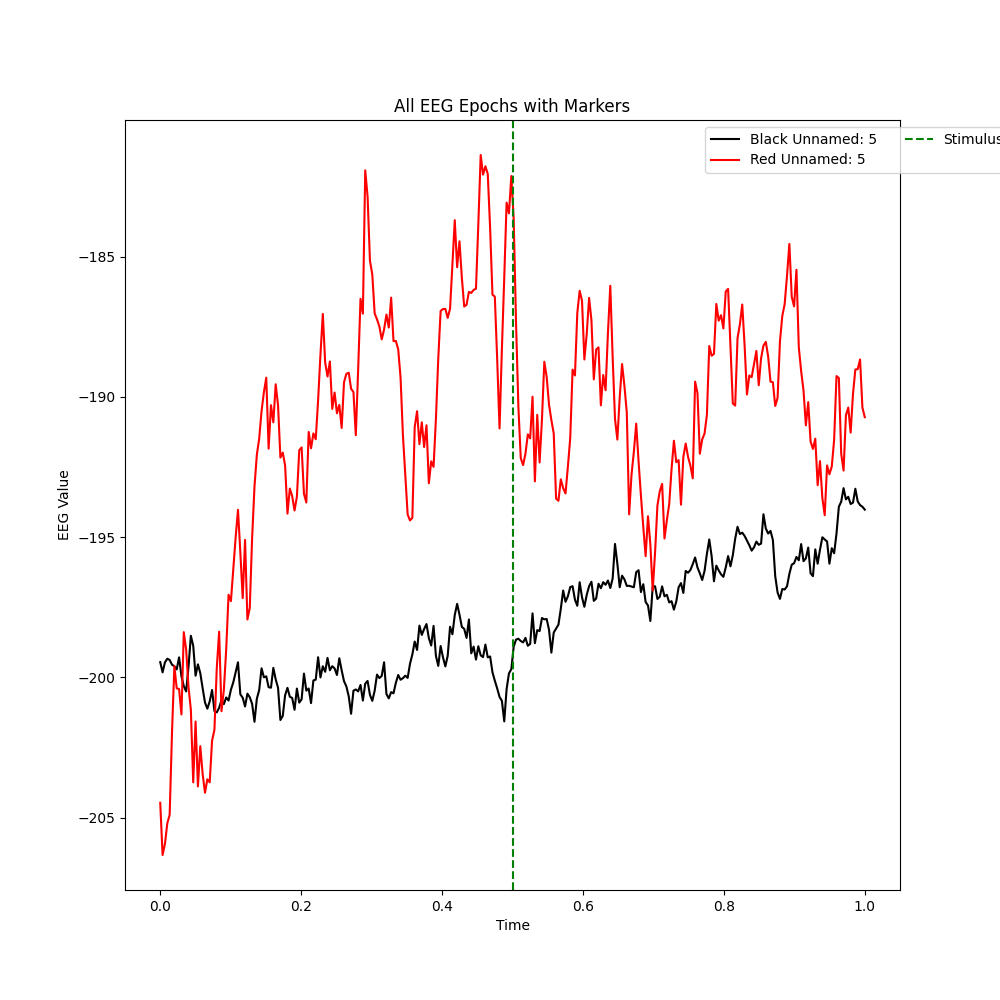

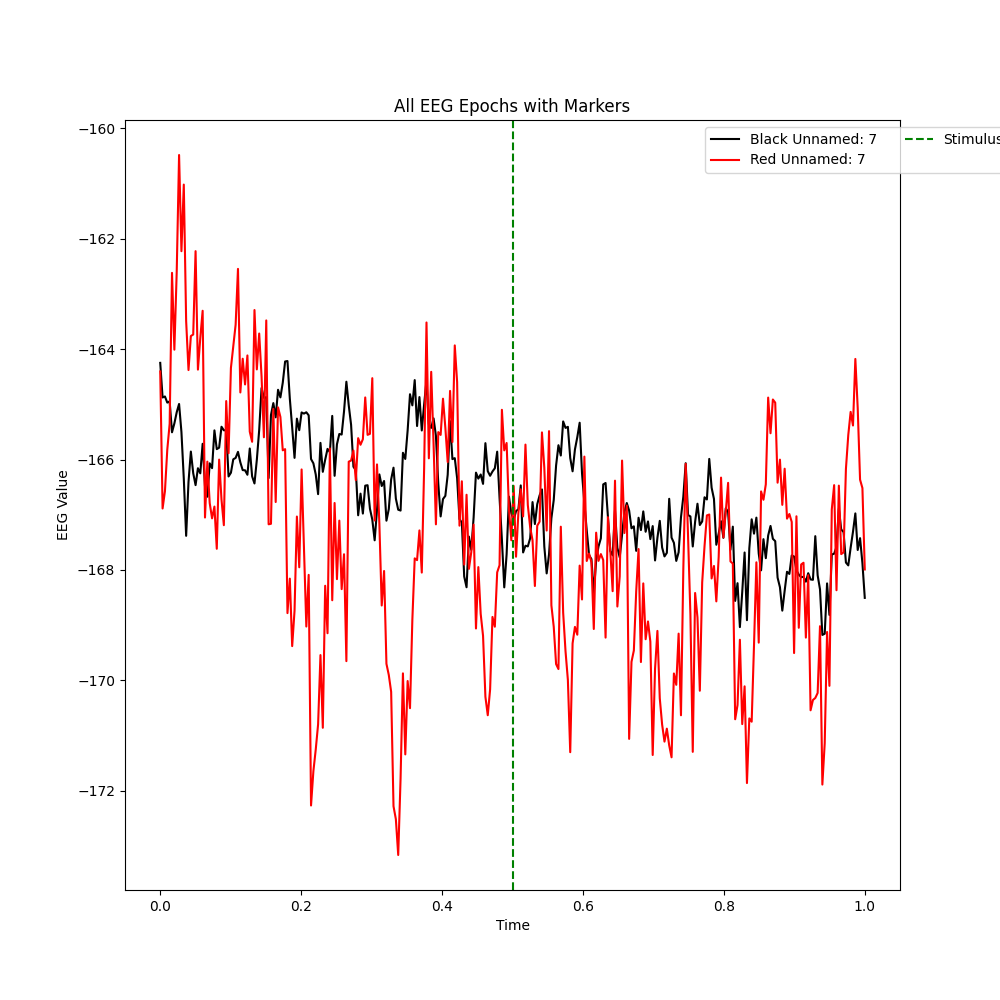

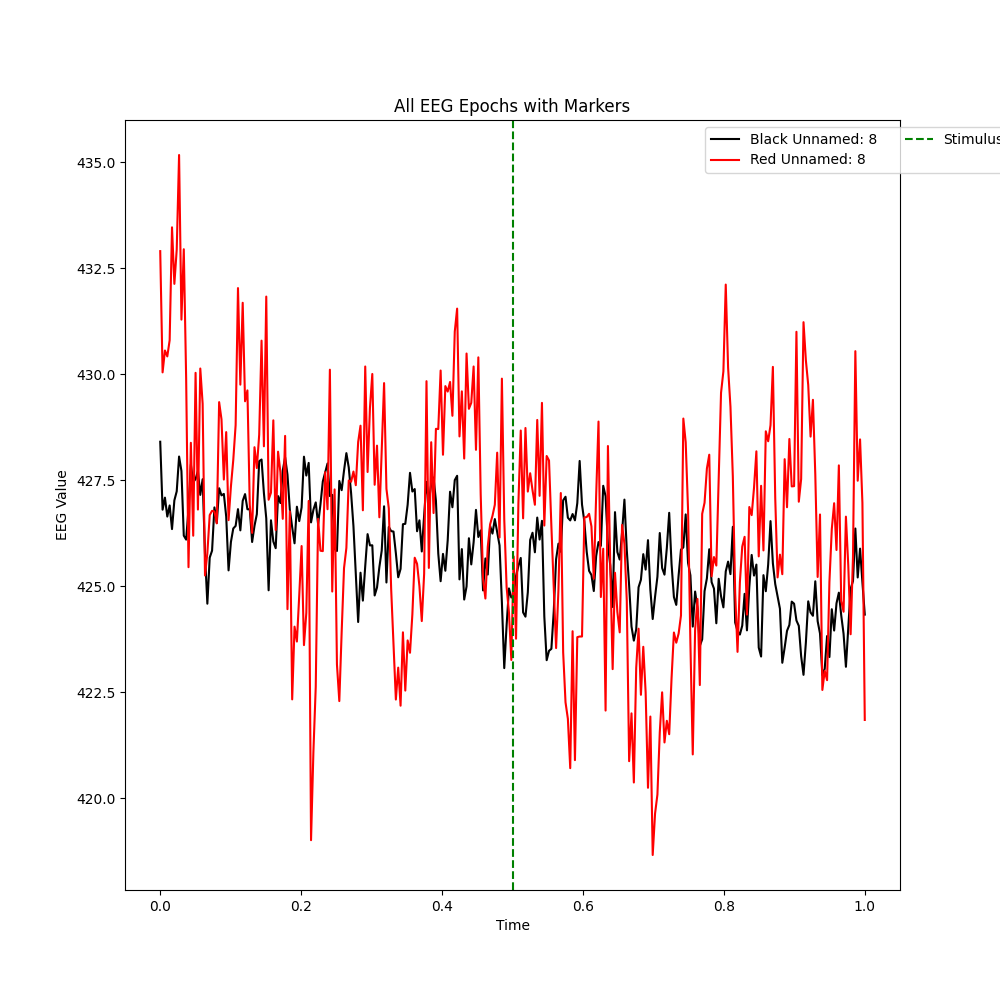

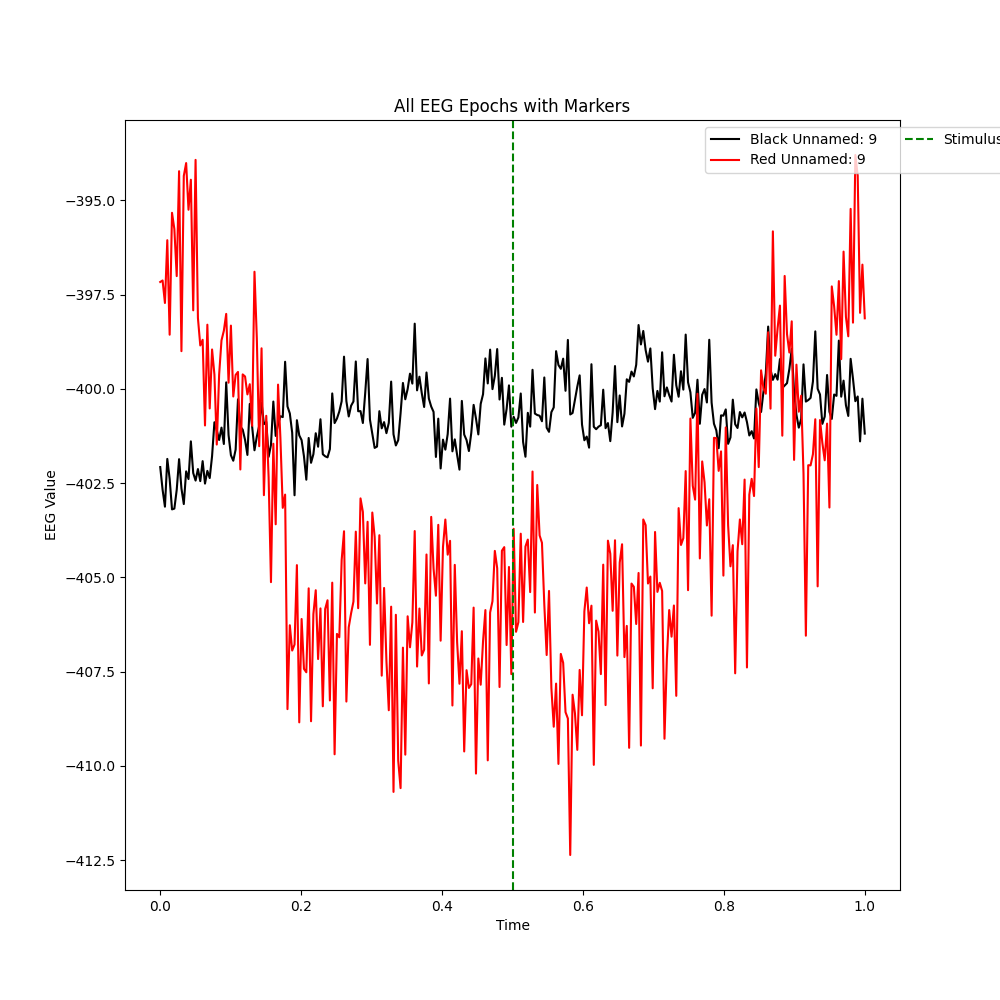

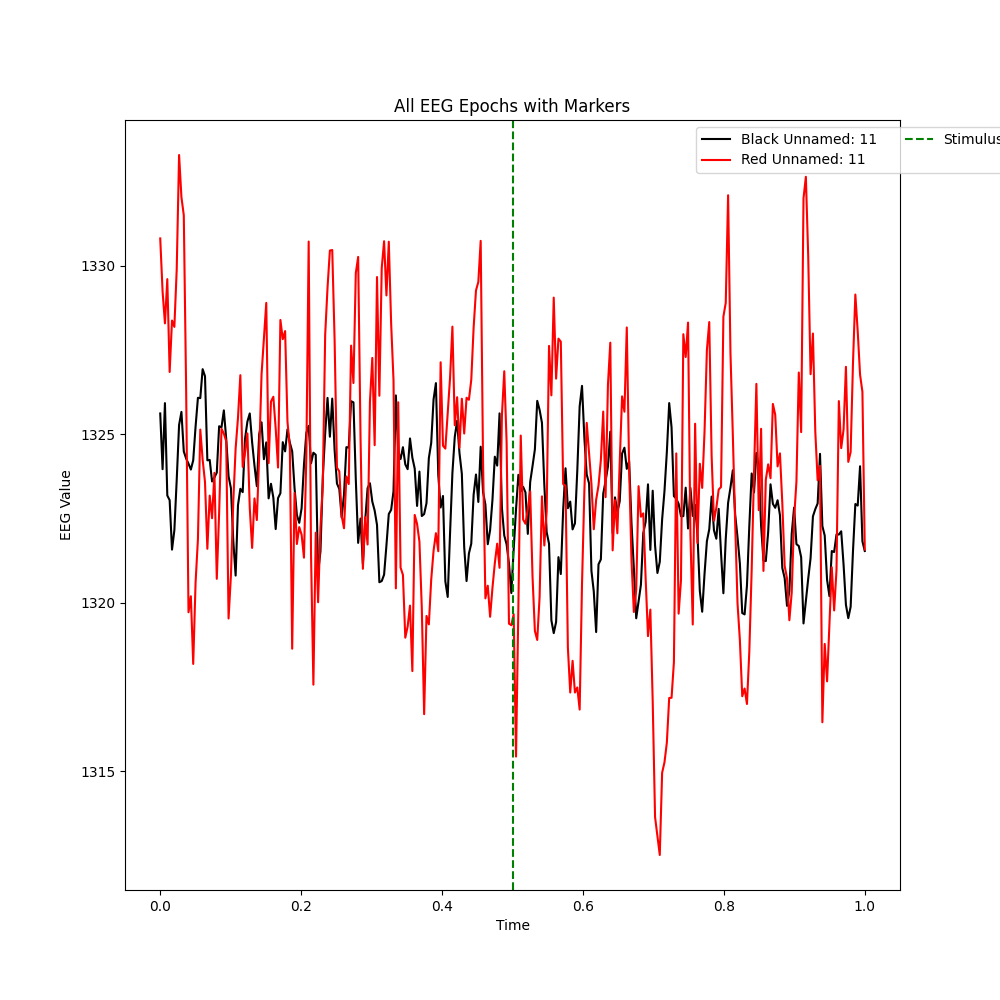

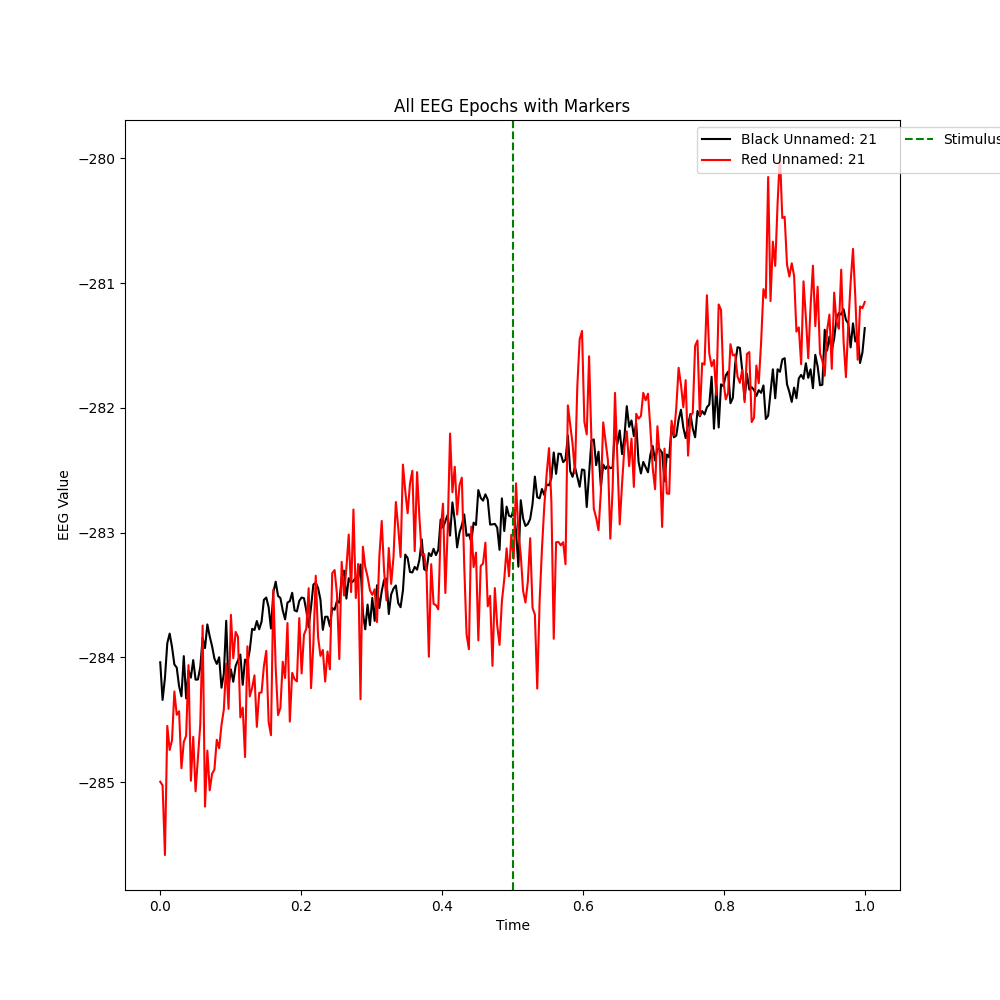

In [26]:
# Define a function to create epochs around markers
def create_epochs(eeg_data, markers, epoch_duration=1.0, sampling_rate=256):
    epochs = []
    half_epoch_samples = int(epoch_duration * sampling_rate / 2)
    time_column = eeg_data.columns[-1]
    
    for index, marker in markers.iterrows():
        if (len(marker['Marker']) == 12):
            marker_time = marker['Time']
            # Find the closest time point in the EEG data
            closest_idx = (np.abs(eeg_data[time_column] - marker_time)).argmin()
            
            # Get the start and end indices for the epoch
            start_idx = max(0, closest_idx - half_epoch_samples)
            end_idx = min(len(eeg_data), closest_idx + half_epoch_samples)
    
            
            # Extract the epoch
            epoch = eeg_data.iloc[start_idx:end_idx].copy()
    
            if (str(marker['Marker'])[9] == str(marker['Marker'])[11]): # check if chosen stimulus is the one in the marker (to see p300 responses)
                epoch["Colour"] = "Red"
            else:
                epoch["Colour"] = "Black"
                
            epochs.append(epoch)
    
    return epochs

# Create epochs
sampling_rate = 300  # Assuming a sampling rate of 256 Hz
epochs = create_epochs(eeg_data_filtered, markers, epoch_duration=1.0, sampling_rate=sampling_rate)


#print example epoch data
print(epochs[0])


# # Plot all epochs on the same plot
# plt.figure(figsize=(10, 10))


# overall_red_avg = 0
# overall_black_avg = 0
# overall_count = 0

for ind, channel in enumerate(channel_columns_filtered):


    # Plot epochs on their own  plot
    plt.figure(figsize=(10, 10))
    
    black_first = True
    red_first = True
    red_avg = 0
    black_avg = 0
    black_count = 0
    red_count = 0
    
    for epoch_index, epoch in enumerate(epochs):
    
                
            
    
        plotted_color = epoch.iloc[0,-1]
        new_val = epoch[channel].values
        # # for index, channel in enumerate(channel_columns_filtered):
        # start_time = epoch.iloc[0, -2]
        # plt.plot(epoch[time_column]-start_time, epoch["Unnamed: 3"], label= "8", color=plotted_color) #f'Epoch {epoch_index+1} - Channel {index+1}', alpha=0.5)
        if plotted_color == "Red":
            if red_first:
                red_avg = new_val
                red_first = False
                red_count += 1
            else:
                red_avg += new_val
                red_count += 1
        else:
            if black_first:
                black_avg = new_val
                black_first = False
                black_count += 1
            else:
                black_avg += new_val
                black_count += 1

    black_avg = black_avg/black_count
    red_avg = red_avg/red_count
    # overall_red_avg += red_avg
    # overall_black_avg += black_avg
    # overall_count += 1
    x = np.linspace(0, 1, 300)

    #overall_red_avg = overall_red_avg/overall_count
    #overall_black_avg = overall_black_avg/overall_count
    plt.plot(x, black_avg, label= "Black "+ channel, color="Black") #f'Epoch {epoch_index+1} - Channel {index+1}', alpha=0.5)
    plt.plot(x, red_avg, label= "Red "+ channel, color="Red") 
    plt.axvline(x=0.5, color='g', linestyle='--', label='Stimulus')
    
    
    plt.xlabel('Time')
    plt.ylabel('EEG Value')
    plt.title('All EEG Epochs with Markers')
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), ncol=2)
    plt.show()
